In [556]:
import os
import re
import glob
import xlrd 
import numpy as np
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
from scipy.special import erf
from math import pow
import math
import sys
from scipy import special
from scipy.linalg import eig
import matplotlib.ticker as ticker
import scipy.stats as stats
import pylab as pl
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator


In [557]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rc('axes', linewidth=4)

In [558]:
#Embedded
#All orbitals included with d-aug-dyall.acv2z x2cmmf+gaunt term

df = pd.read_excel('Iodide_embedded_in_watermolecules.xlsx', skiprows=7, sheet_name = 'Embedded_Iodide_all_orbitals')
df.head()

,Unnamed: 0,iodide_1s,Unnamed: 2,iodide_2s,Unnamed: 4,iodide_2p12,Unnamed: 6,iodide_2p32,Unnamed: 8,iodide_3s,...,Unnamed: 18,iodide_4s,Unnamed: 20,iodide_4p12,Unnamed: 22,iodide_4p32,Unnamed: 24,iodide_4d32,Unnamed: 26,iodide_4d52
0,1220.499631,33211.015452,191.327208,5206.204656,178.541875,4858.302951,167.677401,4562.669753,39.766787,1082.094029,...,7.400320,201.370098,5.472290,148.906478,5.073159,138.045719,2.052070,55.838872,1.988965,54.121727
1,1220.494136,33210.865940,191.321514,5206.049720,178.536215,4858.148955,167.671751,4562.516012,39.760809,1081.931370,...,7.393955,201.196898,5.465957,148.734155,5.067056,137.879652,2.045232,55.652801,1.983052,53.960821
2,1220.499883,33211.022315,191.327156,5206.203233,178.541874,4858.302930,167.677377,4562.669093,39.766307,1082.080984,...,7.399257,201.341181,5.471272,148.878781,5.071996,138.014081,2.051114,55.812861,1.987474,54.081165
3,1220.503738,33211.127203,191.331150,5206.311928,178.545843,4858.410942,167.681358,4562.777431,39.770518,1082.195575,...,7.403766,201.463873,5.475753,149.000708,5.076555,138.138130,2.055557,55.933766,1.992120,54.207567
4,1220.480383,33210.491712,191.307377,5205.665033,178.522142,4857.766012,167.657630,4562.131780,39.746112,1081.531467,...,7.378487,200.775996,5.450544,148.314762,5.051222,137.448815,2.030279,55.245924,1.966595,53.513009


{33211.0: 8, 33210.9: 5, 33211.1: 3, 33210.5: 3, 33211.2: 3, 33209.9: 1, 33209.7: 1, 33205.4: 1, 33210.8: 3, 33211.3: 4, 33205.5: 1, 33221.0: 1, 33211.5: 2, 33210.6: 2, 33210.4: 1, 33211.4: 2, 33206.6: 2, 33210.7: 2, 33206.4: 2, 33207.1: 1, 33212.2: 1, 33223.7: 1}
mean = 33210.756
std = 2.9107497315981083


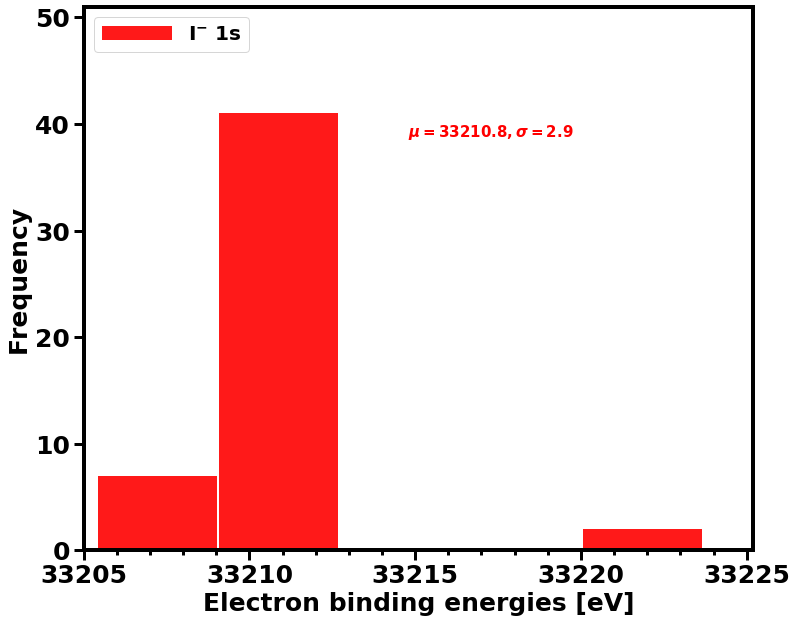

In [559]:
fig, ax = plt.subplots(figsize=(12,10))


x_i_acv2z_x2cmmf_gaunt_1s = df.iodide_1s




y_i_acv2z_x2cmmf_gaunt_1s = [round(num, 1) for num in x_i_acv2z_x2cmmf_gaunt_1s]
z_i_acv2z_x2cmmf_gaunt_1s = np.array(y_i_acv2z_x2cmmf_gaunt_1s)






def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_i_acv2z_x2cmmf_gaunt_1s = count(z_i_acv2z_x2cmmf_gaunt_1s)
print(counted_i_acv2z_x2cmmf_gaunt_1s)

mean_z_i_acv2z_x2cmmf_gaunt_1s = np.mean(z_i_acv2z_x2cmmf_gaunt_1s)
print("mean =", mean_z_i_acv2z_x2cmmf_gaunt_1s)


std_z_i_acv2z_x2cmmf_gaunt_1s = np.std(z_i_acv2z_x2cmmf_gaunt_1s)
print("std =", std_z_i_acv2z_x2cmmf_gaunt_1s)



kwargs = dict(alpha=0.9, bins=5, linewidth=0.2)

dk_i_acv2z_x2cmmf_gaunt_1s = list(dict.keys(counted_i_acv2z_x2cmmf_gaunt_1s))
dv_i_acv2z_x2cmmf_gaunt_1s = list(dict.values(counted_i_acv2z_x2cmmf_gaunt_1s))



dkmin_z_i_acv2z_x2cmmf_gaunt_1s = min(dk_i_acv2z_x2cmmf_gaunt_1s)
dkmax_z_i_acv2z_x2cmmf_gaunt_1s = max(dk_i_acv2z_x2cmmf_gaunt_1s)
dvmin_z_i_acv2z_x2cmmf_gaunt_1s = min(dv_i_acv2z_x2cmmf_gaunt_1s)
dvmax_z_i_acv2z_x2cmmf_gaunt_1s = max(dv_i_acv2z_x2cmmf_gaunt_1s)



ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)


plt.axis([33205, 33225.2, 0, 51])
plt.yticks(np.arange(0, 51, 10))
plt.xticks(np.arange(33205, 33225.2, 5))

plt.hist(z_i_acv2z_x2cmmf_gaunt_1s, **kwargs, color='red', rwidth=0.98, label='I$^{-}$ 1s')

#sns.distplot(z_i_acv2z_x2cmmf_gaunt_1s , color='red', hist=False, kde_kws = {'color':'red', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.figtext(0.5, 0.7, "$\mu=33210.8, \sigma=2.9$", fontsize=15, color="red")
#plt.savefig('zero_i_acv2z_x2cmmf_gaunt_1s.png', bbox_inches='tight', dpi=400)

plt.show()



{5206.2: 5, 5206.0: 6, 5206.3: 2, 5205.7: 4, 5206.4: 4, 5204.8: 1, 5204.7: 1, 5204.6: 2, 5205.9: 2, 5206.5: 5, 5201.9: 1, 5206.1: 7, 5206.7: 2, 5205.8: 2, 5205.5: 1, 5206.6: 1, 5202.5: 1, 5211.9: 1, 5205.1: 1, 5204.4: 1}
mean = 5205.932
std = 1.2525877214789924


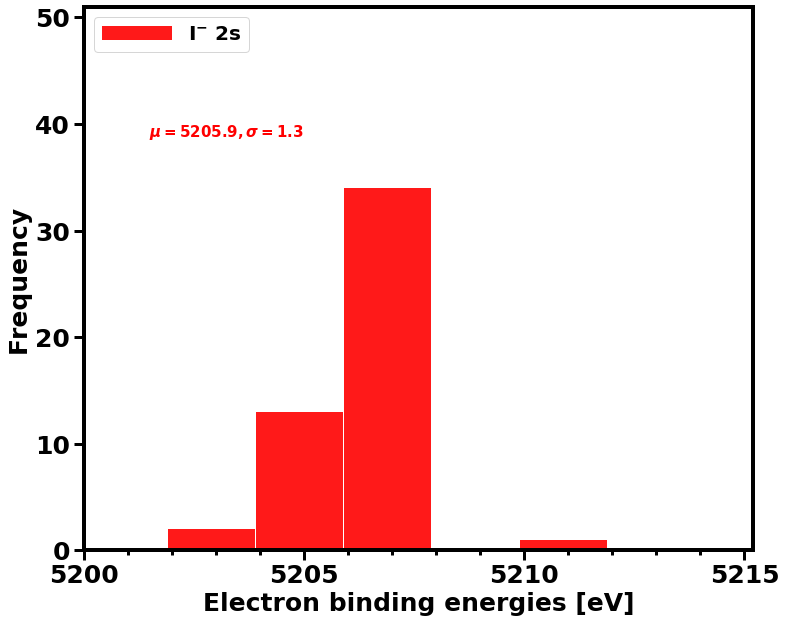

In [560]:
fig, ax = plt.subplots(figsize=(12,10))


x_i_acv2z_x2cmmf_gaunt_2s = df.iodide_2s




y_i_acv2z_x2cmmf_gaunt_2s = [round(num, 1) for num in x_i_acv2z_x2cmmf_gaunt_2s]
z_i_acv2z_x2cmmf_gaunt_2s = np.array(y_i_acv2z_x2cmmf_gaunt_2s)






def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_i_acv2z_x2cmmf_gaunt_2s = count(z_i_acv2z_x2cmmf_gaunt_2s)
print(counted_i_acv2z_x2cmmf_gaunt_2s)

mean_z_i_acv2z_x2cmmf_gaunt_2s = np.mean(z_i_acv2z_x2cmmf_gaunt_2s)
print("mean =", mean_z_i_acv2z_x2cmmf_gaunt_2s)


std_z_i_acv2z_x2cmmf_gaunt_2s = np.std(z_i_acv2z_x2cmmf_gaunt_2s)
print("std =", std_z_i_acv2z_x2cmmf_gaunt_2s)



kwargs = dict(alpha=0.9, bins=5, linewidth=0.2)

dk_i_acv2z_x2cmmf_gaunt_2s = list(dict.keys(counted_i_acv2z_x2cmmf_gaunt_2s))
dv_i_acv2z_x2cmmf_gaunt_2s = list(dict.values(counted_i_acv2z_x2cmmf_gaunt_2s))



dkmin_z_i_acv2z_x2cmmf_gaunt_2s = min(dk_i_acv2z_x2cmmf_gaunt_2s)
dkmax_z_i_acv2z_x2cmmf_gaunt_2s = max(dk_i_acv2z_x2cmmf_gaunt_2s)
dvmin_z_i_acv2z_x2cmmf_gaunt_2s = min(dv_i_acv2z_x2cmmf_gaunt_2s)
dvmax_z_i_acv2z_x2cmmf_gaunt_2s = max(dv_i_acv2z_x2cmmf_gaunt_2s)



ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)


plt.axis([5200, 5215.2, 0, 51])
plt.yticks(np.arange(0, 51, 10))
plt.xticks(np.arange(5200, 5215.2, 5))

plt.hist(z_i_acv2z_x2cmmf_gaunt_2s, **kwargs, color='red', rwidth=0.99, label='I$^{-}$ 2s')

#sns.distplot(z_i_acv2z_x2cmmf_gaunt_2s , color='red', hist=False, kde_kws = {'color':'red', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.figtext(0.2, 0.7, "$\mu=5205.9, \sigma=1.3$", fontsize=15, color="red")
#plt.savefig('zero_i_acv2z_x2cmmf_gaunt_2s.png', bbox_inches='tight', dpi=400)

plt.show()



{4562.7: 6, 4562.5: 4, 4562.8: 2, 4562.1: 2, 4562.9: 5, 4561.3: 2, 4561.1: 1, 4562.2: 3, 4558.2: 2, 4562.4: 3, 4563.0: 3, 4557.4: 1, 4563.1: 1, 4562.6: 7, 4562.0: 1, 4563.2: 1, 4562.3: 1, 4560.3: 1, 4559.7: 1, 4560.7: 1, 4560.6: 1, 4560.8: 1}
mean = 4562.034000000001
std = 1.2899007713774155
{4858.3: 7, 4858.1: 3, 4858.4: 2, 4857.8: 4, 4858.5: 5, 4857.0: 2, 4856.8: 1, 4855.2: 1, 4858.0: 2, 4858.6: 4, 4853.5: 1, 4858.2: 7, 4858.8: 2, 4857.9: 2, 4857.6: 2, 4858.7: 1, 4854.2: 1, 4862.9: 1, 4856.6: 1, 4859.7: 1}
mean = 4858.018
std = 1.2730577363183329


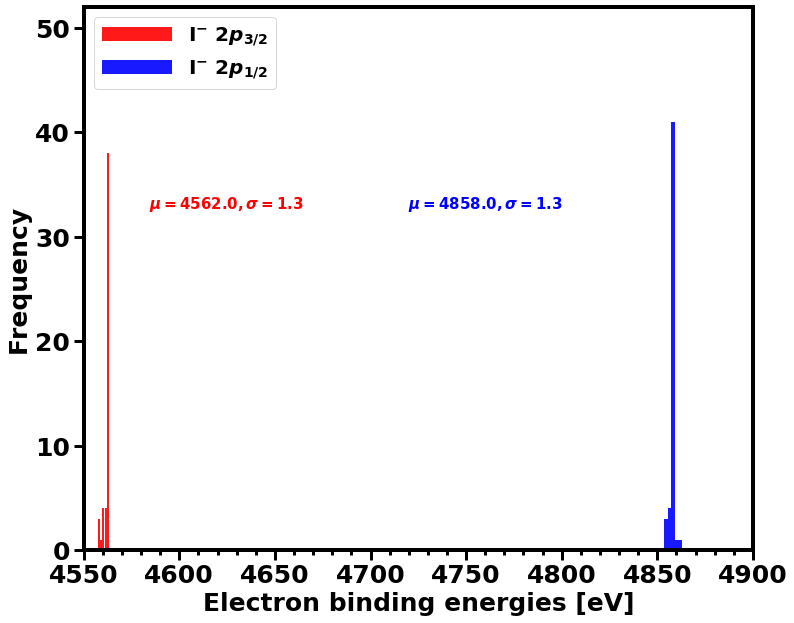

In [561]:
fig, ax = plt.subplots(figsize=(12,10))


x_i_acv2z_x2cmmf_gaunt_2p32 = df.iodide_2p32
x_i_acv2z_x2cmmf_gaunt_2p12 = df.iodide_2p12



y_i_acv2z_x2cmmf_gaunt_2p32 = [round(num, 1) for num in x_i_acv2z_x2cmmf_gaunt_2p32]
z_i_acv2z_x2cmmf_gaunt_2p32 = np.array(y_i_acv2z_x2cmmf_gaunt_2p32)



y_i_acv2z_x2cmmf_gaunt_2p12 = [round(num, 1) for num in x_i_acv2z_x2cmmf_gaunt_2p12]
z_i_acv2z_x2cmmf_gaunt_2p12 = np.array(y_i_acv2z_x2cmmf_gaunt_2p12)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_i_acv2z_x2cmmf_gaunt_2p32 = count(z_i_acv2z_x2cmmf_gaunt_2p32)
print(counted_i_acv2z_x2cmmf_gaunt_2p32)

mean_z_i_acv2z_x2cmmf_gaunt_2p32 = np.mean(z_i_acv2z_x2cmmf_gaunt_2p32)
print("mean =", mean_z_i_acv2z_x2cmmf_gaunt_2p32)


std_z_i_acv2z_x2cmmf_gaunt_2p32 = np.std(z_i_acv2z_x2cmmf_gaunt_2p32)
print("std =", std_z_i_acv2z_x2cmmf_gaunt_2p32)


def count(list_z1) -> dict:
    hist = {}
    for i in list_z1:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_i_acv2z_x2cmmf_gaunt_2p12 = count(z_i_acv2z_x2cmmf_gaunt_2p12)
print(counted_i_acv2z_x2cmmf_gaunt_2p12)

mean_z_i_acv2z_x2cmmf_gaunt_2p12 = np.mean(z_i_acv2z_x2cmmf_gaunt_2p12)
print("mean =", mean_z_i_acv2z_x2cmmf_gaunt_2p12)


std_z_i_acv2z_x2cmmf_gaunt_2p12 = np.std(z_i_acv2z_x2cmmf_gaunt_2p12)
print("std =", std_z_i_acv2z_x2cmmf_gaunt_2p12)


kwargs = dict(alpha=0.9, bins=5, linewidth=0.2)

dk_i_acv2z_x2cmmf_gaunt_2p32 = list(dict.keys(counted_i_acv2z_x2cmmf_gaunt_2p32))
dv_i_acv2z_x2cmmf_gaunt_2p32 = list(dict.values(counted_i_acv2z_x2cmmf_gaunt_2p32))


dk_i_acv2z_x2cmmf_gaunt_2p12 = list(dict.keys(counted_i_acv2z_x2cmmf_gaunt_2p12))
dv_i_acv2z_x2cmmf_gaunt_2p12 = list(dict.values(counted_i_acv2z_x2cmmf_gaunt_2p12))



dkmin_z_i_acv2z_x2cmmf_gaunt_2p32 = min(dk_i_acv2z_x2cmmf_gaunt_2p32)
dkmax_z_i_acv2z_x2cmmf_gaunt_2p32 = max(dk_i_acv2z_x2cmmf_gaunt_2p32)
dvmin_z_i_acv2z_x2cmmf_gaunt_2p32 = min(dv_i_acv2z_x2cmmf_gaunt_2p32)
dvmax_z_i_acv2z_x2cmmf_gaunt_2p32 = max(dv_i_acv2z_x2cmmf_gaunt_2p32)

dkmin_z_i_acv2z_x2cmmf_gaunt_2p12 = min(dk_i_acv2z_x2cmmf_gaunt_2p12)
dkmax_z_i_acv2z_x2cmmf_gaunt_2p12 = max(dk_i_acv2z_x2cmmf_gaunt_2p12)
dvmin_z_i_acv2z_x2cmmf_gaunt_2p12 = min(dv_i_acv2z_x2cmmf_gaunt_2p12)
dvmax_z_i_acv2z_x2cmmf_gaunt_2p12 = max(dv_i_acv2z_x2cmmf_gaunt_2p12)




ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)


plt.axis([4550, 4900.2, 0, 52])
plt.yticks(np.arange(0, 52, 10))
plt.xticks(np.arange(4550, 4900.2, 50))

plt.hist(z_i_acv2z_x2cmmf_gaunt_2p32, **kwargs, color='red', rwidth=0.98, label='I$^{-}$ 2$p_{3/2}$')
plt.hist(z_i_acv2z_x2cmmf_gaunt_2p12, **kwargs, color='blue', rwidth=0.98, label='I$^{-}$ 2$p_{1/2}$')
#sns.distplot(z_i_acv2z_x2cmmf_gaunt_2p32 , color='red', hist=False, kde_kws = {'color':'red', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
#sns.distplot(z_i_acv2z_x2cmmf_gaunt_2p12, color='blue', hist=False, kde_kws = {'color':'blue', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.figtext(0.2, 0.6, "$\mu=4562.0, \sigma=1.3$", fontsize=15, color="red")
plt.figtext(0.5, 0.6, "$\mu=4858.0, \sigma=1.3$", fontsize=15, color="blue")
#plt.savefig('zero_i_acv2z_x2cmmf_gaunt_2p1232.png', bbox_inches='tight', dpi=400)

plt.show()



{1082.1: 5, 1081.9: 5, 1082.2: 2, 1081.5: 2, 1082.3: 4, 1080.3: 1, 1080.2: 1, 1081.7: 3, 1081.0: 1, 1081.8: 5, 1082.4: 4, 1082.0: 8, 1082.6: 3, 1081.6: 2, 1081.4: 3, 1082.5: 1}
mean = 1081.91
std = 0.4817675788178264


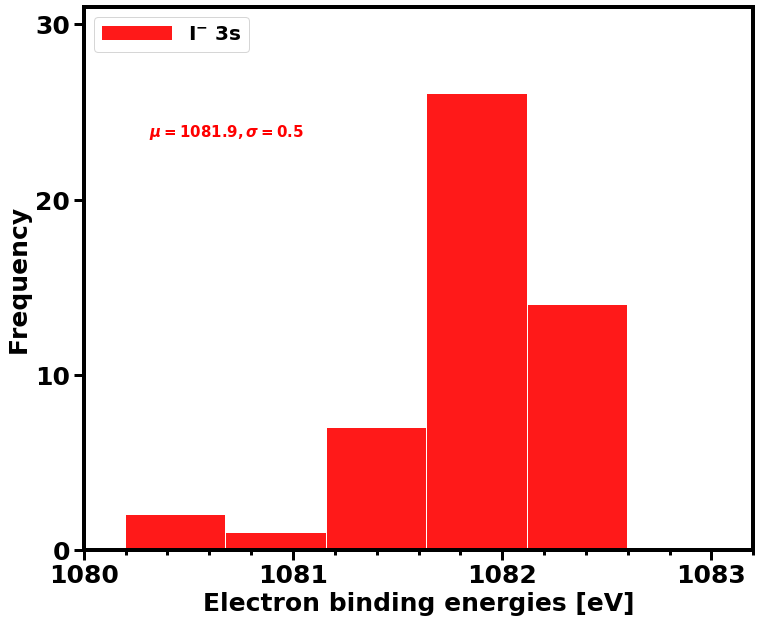

In [562]:
fig, ax = plt.subplots(figsize=(12,10))


x_i_acv2z_x2cmmf_gaunt_3s = df.iodide_3s




y_i_acv2z_x2cmmf_gaunt_3s = [round(num, 1) for num in x_i_acv2z_x2cmmf_gaunt_3s]
z_i_acv2z_x2cmmf_gaunt_3s = np.array(y_i_acv2z_x2cmmf_gaunt_3s)






def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_i_acv2z_x2cmmf_gaunt_3s = count(z_i_acv2z_x2cmmf_gaunt_3s)
print(counted_i_acv2z_x2cmmf_gaunt_3s)

mean_z_i_acv2z_x2cmmf_gaunt_3s = np.mean(z_i_acv2z_x2cmmf_gaunt_3s)
print("mean =", mean_z_i_acv2z_x2cmmf_gaunt_3s)


std_z_i_acv2z_x2cmmf_gaunt_3s = np.std(z_i_acv2z_x2cmmf_gaunt_3s)
print("std =", std_z_i_acv2z_x2cmmf_gaunt_3s)



kwargs = dict(alpha=0.9, bins=5, linewidth=0.2)

dk_i_acv2z_x2cmmf_gaunt_3s = list(dict.keys(counted_i_acv2z_x2cmmf_gaunt_3s))
dv_i_acv2z_x2cmmf_gaunt_3s = list(dict.values(counted_i_acv2z_x2cmmf_gaunt_3s))



dkmin_z_i_acv2z_x2cmmf_gaunt_3s = min(dk_i_acv2z_x2cmmf_gaunt_3s)
dkmax_z_i_acv2z_x2cmmf_gaunt_3s = max(dk_i_acv2z_x2cmmf_gaunt_3s)
dvmin_z_i_acv2z_x2cmmf_gaunt_3s = min(dv_i_acv2z_x2cmmf_gaunt_3s)
dvmax_z_i_acv2z_x2cmmf_gaunt_3s = max(dv_i_acv2z_x2cmmf_gaunt_3s)



ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)


plt.axis([1080, 1083.2, 0, 31])
plt.yticks(np.arange(0, 31, 10))
plt.xticks(np.arange(1080, 1083.2, 1))

plt.hist(z_i_acv2z_x2cmmf_gaunt_3s, **kwargs, color='red', rwidth=0.99, label='I$^{-}$ 3s')

#sns.distplot(z_i_acv2z_x2cmmf_gaunt_3s , color='red', hist=False, kde_kws = {'color':'red', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.figtext(0.2, 0.7, "$\mu=1081.9, \sigma=0.5$", fontsize=15, color="red")
#plt.savefig('zero_i_acv2z_x2cmmf_gaunt_3s.png', bbox_inches='tight', dpi=400)

plt.show()



{624.6: 5, 624.4: 5, 624.7: 2, 624.0: 2, 624.8: 4, 622.9: 2, 622.7: 2, 624.2: 2, 622.2: 1, 624.3: 3, 624.9: 4, 623.8: 2, 625.1: 2, 624.5: 6, 624.1: 2, 623.9: 3, 625.0: 2, 623.5: 1}
mean = 624.282
std = 0.6495198226382263
{636.1: 6, 635.9: 3, 636.2: 3, 635.5: 2, 636.3: 4, 634.4: 1, 634.2: 1, 635.7: 2, 638.6: 1, 635.8: 3, 636.4: 4, 637.3: 1, 636.0: 10, 636.6: 2, 635.6: 3, 635.4: 1, 636.5: 1, 637.1: 1, 636.8: 1}
mean = 636.076
std = 0.626597159265821


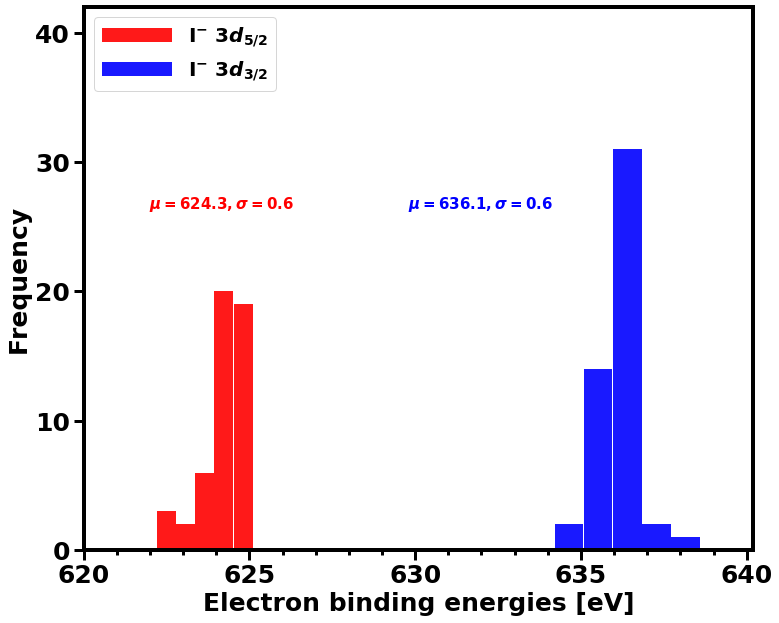

In [563]:
fig, ax = plt.subplots(figsize=(12,10))


x_i_acv2z_x2cmmf_gaunt_3d52 = df.iodide_3d52
x_i_acv2z_x2cmmf_gaunt_3d32 = df.iodide_3d32



y_i_acv2z_x2cmmf_gaunt_3d52 = [round(num, 1) for num in x_i_acv2z_x2cmmf_gaunt_3d52]
z_i_acv2z_x2cmmf_gaunt_3d52 = np.array(y_i_acv2z_x2cmmf_gaunt_3d52)



y_i_acv2z_x2cmmf_gaunt_3d32 = [round(num, 1) for num in x_i_acv2z_x2cmmf_gaunt_3d32]
z_i_acv2z_x2cmmf_gaunt_3d32 = np.array(y_i_acv2z_x2cmmf_gaunt_3d32)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_i_acv2z_x2cmmf_gaunt_3d52 = count(z_i_acv2z_x2cmmf_gaunt_3d52)
print(counted_i_acv2z_x2cmmf_gaunt_3d52)

mean_z_i_acv2z_x2cmmf_gaunt_3d52 = np.mean(z_i_acv2z_x2cmmf_gaunt_3d52)
print("mean =", mean_z_i_acv2z_x2cmmf_gaunt_3d52)


std_z_i_acv2z_x2cmmf_gaunt_3d52 = np.std(z_i_acv2z_x2cmmf_gaunt_3d52)
print("std =", std_z_i_acv2z_x2cmmf_gaunt_3d52)


def count(list_z1) -> dict:
    hist = {}
    for i in list_z1:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_i_acv2z_x2cmmf_gaunt_3d32 = count(z_i_acv2z_x2cmmf_gaunt_3d32)
print(counted_i_acv2z_x2cmmf_gaunt_3d32)

mean_z_i_acv2z_x2cmmf_gaunt_3d32 = np.mean(z_i_acv2z_x2cmmf_gaunt_3d32)
print("mean =", mean_z_i_acv2z_x2cmmf_gaunt_3d32)


std_z_i_acv2z_x2cmmf_gaunt_3d32 = np.std(z_i_acv2z_x2cmmf_gaunt_3d32)
print("std =", std_z_i_acv2z_x2cmmf_gaunt_3d32)


kwargs = dict(alpha=0.9, bins=5, linewidth=0.2)

dk_i_acv2z_x2cmmf_gaunt_3d52 = list(dict.keys(counted_i_acv2z_x2cmmf_gaunt_3d52))
dv_i_acv2z_x2cmmf_gaunt_3d52 = list(dict.values(counted_i_acv2z_x2cmmf_gaunt_3d52))


dk_i_acv2z_x2cmmf_gaunt_3d32 = list(dict.keys(counted_i_acv2z_x2cmmf_gaunt_3d52))
dv_i_acv2z_x2cmmf_gaunt_3d32 = list(dict.values(counted_i_acv2z_x2cmmf_gaunt_3d52))



dkmin_z_i_acv2z_x2cmmf_gaunt_3d52 = min(dk_i_acv2z_x2cmmf_gaunt_3d52)
dkmax_z_i_acv2z_x2cmmf_gaunt_3d52 = max(dk_i_acv2z_x2cmmf_gaunt_3d52)
dvmin_z_i_acv2z_x2cmmf_gaunt_3d52 = min(dv_i_acv2z_x2cmmf_gaunt_3d52)
dvmax_z_i_acv2z_x2cmmf_gaunt_3d52 = max(dv_i_acv2z_x2cmmf_gaunt_3d52)

dkmin_z_i_acv2z_x2cmmf_gaunt_3d32 = min(dk_i_acv2z_x2cmmf_gaunt_3d32)
dkmax_z_i_acv2z_x2cmmf_gaunt_3d32 = max(dk_i_acv2z_x2cmmf_gaunt_3d32)
dvmin_z_i_acv2z_x2cmmf_gaunt_3d32 = min(dv_i_acv2z_x2cmmf_gaunt_3d32)
dvmax_z_i_acv2z_x2cmmf_gaunt_3d32 = max(dv_i_acv2z_x2cmmf_gaunt_3d32)




ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)


plt.axis([620, 640.2, 0, 42])
plt.yticks(np.arange(0, 42, 10))
plt.xticks(np.arange(620, 640.2, 5))

plt.hist(z_i_acv2z_x2cmmf_gaunt_3d52, **kwargs, color='red', rwidth=0.98, label='I$^{-}$ 3$d_{5/2}$')
plt.hist(z_i_acv2z_x2cmmf_gaunt_3d32, **kwargs, color='blue', rwidth=0.98, label='I$^{-}$ 3$d_{3/2}$')
#sns.distplot(z_i_acv2z_x2cmmf_gaunt_3d52 , color='red', hist=False, kde_kws = {'color':'red', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
#sns.distplot(z_i_acv2z_x2cmmf_gaunt_3d32, color='blue', hist=False, kde_kws = {'color':'blue', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.figtext(0.2, 0.6, "$\mu=624.3, \sigma=0.6$", fontsize=15, color="red")
plt.figtext(0.5, 0.6, "$\mu=636.1, \sigma=0.6$", fontsize=15, color="blue")
#plt.savefig('zero_i_acv2z_x2cmmf_gaunt_3d3252.png', bbox_inches='tight', dpi=400)

plt.show()



{201.4: 5, 201.2: 7, 201.3: 8, 201.5: 3, 200.8: 3, 201.6: 4, 199.3: 2, 201.0: 2, 201.1: 5, 201.7: 4, 201.8: 1, 200.9: 4, 200.7: 1, 201.9: 1}
mean = 201.2
std = 0.47916594202843504


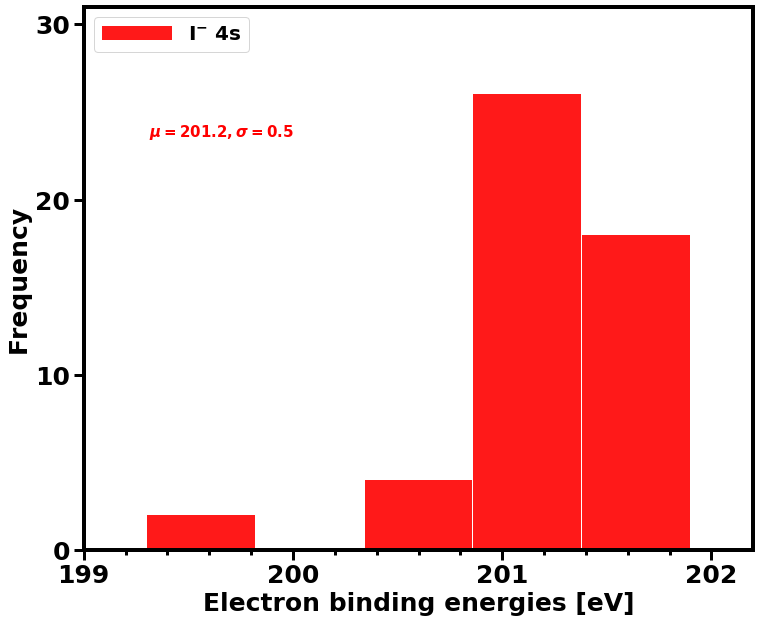

In [564]:
fig, ax = plt.subplots(figsize=(12,10))


x_i_acv2z_x2cmmf_gaunt_4s = df.iodide_4s




y_i_acv2z_x2cmmf_gaunt_4s = [round(num, 1) for num in x_i_acv2z_x2cmmf_gaunt_4s]
z_i_acv2z_x2cmmf_gaunt_4s = np.array(y_i_acv2z_x2cmmf_gaunt_4s)






def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_i_acv2z_x2cmmf_gaunt_4s = count(z_i_acv2z_x2cmmf_gaunt_4s)
print(counted_i_acv2z_x2cmmf_gaunt_4s)

mean_z_i_acv2z_x2cmmf_gaunt_4s = np.mean(z_i_acv2z_x2cmmf_gaunt_4s)
print("mean =", mean_z_i_acv2z_x2cmmf_gaunt_4s)


std_z_i_acv2z_x2cmmf_gaunt_4s = np.std(z_i_acv2z_x2cmmf_gaunt_4s)
print("std =", std_z_i_acv2z_x2cmmf_gaunt_4s)



kwargs = dict(alpha=0.9, bins=5, linewidth=0.2)

dk_i_acv2z_x2cmmf_gaunt_4s = list(dict.keys(counted_i_acv2z_x2cmmf_gaunt_4s))
dv_i_acv2z_x2cmmf_gaunt_4s = list(dict.values(counted_i_acv2z_x2cmmf_gaunt_4s))



dkmin_z_i_acv2z_x2cmmf_gaunt_4s = min(dk_i_acv2z_x2cmmf_gaunt_4s)
dkmax_z_i_acv2z_x2cmmf_gaunt_4s = max(dk_i_acv2z_x2cmmf_gaunt_4s)
dvmin_z_i_acv2z_x2cmmf_gaunt_4s = min(dv_i_acv2z_x2cmmf_gaunt_4s)
dvmax_z_i_acv2z_x2cmmf_gaunt_4s = max(dv_i_acv2z_x2cmmf_gaunt_4s)



ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)


plt.axis([199, 202.2, 0, 31])
plt.yticks(np.arange(0, 31, 10))
plt.xticks(np.arange(199, 202.2, 1))

plt.hist(z_i_acv2z_x2cmmf_gaunt_4s, **kwargs, color='red', rwidth=0.99, label='I$^{-}$ 4s')

#sns.distplot(z_i_acv2z_x2cmmf_gaunt_4s , color='red', hist=False, kde_kws = {'color':'red', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.figtext(0.2, 0.7, "$\mu=201.2, \sigma=0.5$", fontsize=15, color="red")
#plt.savefig('zero_i_acv2z_x2cmmf_gaunt_4s.png', bbox_inches='tight', dpi=400)

plt.show()



{138.0: 6, 137.9: 11, 138.1: 4, 137.4: 3, 138.3: 4, 135.9: 1, 135.8: 1, 137.5: 5, 137.6: 4, 137.8: 4, 138.4: 3, 138.5: 1, 138.2: 2, 138.6: 1}
mean = 137.844
std = 0.5068175214019333
{148.9: 7, 148.7: 5, 149.0: 2, 148.3: 3, 149.1: 4, 146.9: 2, 148.5: 2, 148.6: 6, 149.2: 3, 148.8: 7, 149.4: 2, 148.4: 3, 148.2: 1, 149.3: 3}
mean = 148.736
std = 0.4803165622795027


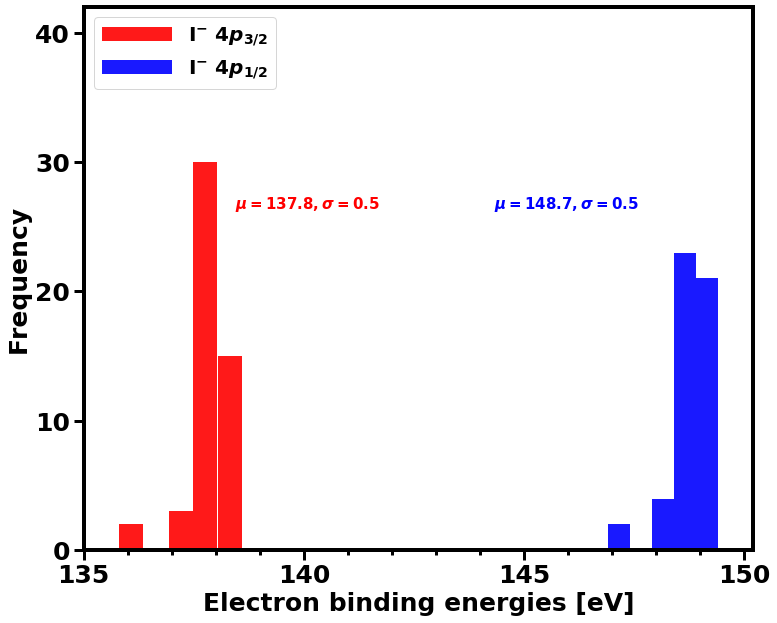

In [565]:
fig, ax = plt.subplots(figsize=(12,10))


x_i_acv2z_x2cmmf_gaunt_4p32 = df.iodide_4p32
x_i_acv2z_x2cmmf_gaunt_4p12 = df.iodide_4p12



y_i_acv2z_x2cmmf_gaunt_4p32 = [round(num, 1) for num in x_i_acv2z_x2cmmf_gaunt_4p32]
z_i_acv2z_x2cmmf_gaunt_4p32 = np.array(y_i_acv2z_x2cmmf_gaunt_4p32)



y_i_acv2z_x2cmmf_gaunt_4p12 = [round(num, 1) for num in x_i_acv2z_x2cmmf_gaunt_4p12]
z_i_acv2z_x2cmmf_gaunt_4p12 = np.array(y_i_acv2z_x2cmmf_gaunt_4p12)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_i_acv2z_x2cmmf_gaunt_4p32 = count(z_i_acv2z_x2cmmf_gaunt_4p32)
print(counted_i_acv2z_x2cmmf_gaunt_4p32)

mean_z_i_acv2z_x2cmmf_gaunt_4p32 = np.mean(z_i_acv2z_x2cmmf_gaunt_4p32)
print("mean =", mean_z_i_acv2z_x2cmmf_gaunt_4p32)


std_z_i_acv2z_x2cmmf_gaunt_4p32 = np.std(z_i_acv2z_x2cmmf_gaunt_4p32)
print("std =", std_z_i_acv2z_x2cmmf_gaunt_4p32)


def count(list_z1) -> dict:
    hist = {}
    for i in list_z1:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_i_acv2z_x2cmmf_gaunt_4p12 = count(z_i_acv2z_x2cmmf_gaunt_4p12)
print(counted_i_acv2z_x2cmmf_gaunt_4p12)

mean_z_i_acv2z_x2cmmf_gaunt_4p12 = np.mean(z_i_acv2z_x2cmmf_gaunt_4p12)
print("mean =", mean_z_i_acv2z_x2cmmf_gaunt_4p12)


std_z_i_acv2z_x2cmmf_gaunt_4p12 = np.std(z_i_acv2z_x2cmmf_gaunt_4p12)
print("std =", std_z_i_acv2z_x2cmmf_gaunt_4p12)


kwargs = dict(alpha=0.9, bins=5, linewidth=0.2)

dk_i_acv2z_x2cmmf_gaunt_4p32 = list(dict.keys(counted_i_acv2z_x2cmmf_gaunt_4p32))
dv_i_acv2z_x2cmmf_gaunt_4p32 = list(dict.values(counted_i_acv2z_x2cmmf_gaunt_4p32))


dk_i_acv2z_x2cmmf_gaunt_4p12 = list(dict.keys(counted_i_acv2z_x2cmmf_gaunt_4p12))
dv_i_acv2z_x2cmmf_gaunt_4p12 = list(dict.values(counted_i_acv2z_x2cmmf_gaunt_4p12))



dkmin_z_i_acv2z_x2cmmf_gaunt_4p32 = min(dk_i_acv2z_x2cmmf_gaunt_4p32)
dkmax_z_i_acv2z_x2cmmf_gaunt_4p32 = max(dk_i_acv2z_x2cmmf_gaunt_4p32)
dvmin_z_i_acv2z_x2cmmf_gaunt_4p32 = min(dv_i_acv2z_x2cmmf_gaunt_4p32)
dvmax_z_i_acv2z_x2cmmf_gaunt_4p32 = max(dv_i_acv2z_x2cmmf_gaunt_4p32)

dkmin_z_i_acv2z_x2cmmf_gaunt_4p12 = min(dk_i_acv2z_x2cmmf_gaunt_4p12)
dkmax_z_i_acv2z_x2cmmf_gaunt_4p12 = max(dk_i_acv2z_x2cmmf_gaunt_4p12)
dvmin_z_i_acv2z_x2cmmf_gaunt_4p12 = min(dv_i_acv2z_x2cmmf_gaunt_4p12)
dvmax_z_i_acv2z_x2cmmf_gaunt_4p12 = max(dv_i_acv2z_x2cmmf_gaunt_4p12)




ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)


plt.axis([135, 150.2, 0, 42])
plt.yticks(np.arange(0, 42, 10))
plt.xticks(np.arange(135, 150.2, 5))

plt.hist(z_i_acv2z_x2cmmf_gaunt_4p32, **kwargs, color='red', rwidth=0.98, label='I$^{-}$ 4$p_{3/2}$')
plt.hist(z_i_acv2z_x2cmmf_gaunt_4p12, **kwargs, color='blue', rwidth=0.98, label='I$^{-}$ 4$p_{1/2}$')
#sns.distplot(z_i_acv2z_x2cmmf_gaunt_4p32 , color='red', hist=False, kde_kws = {'color':'red', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
#sns.distplot(z_i_acv2z_x2cmmf_gaunt_4p12, color='blue', hist=False, kde_kws = {'color':'blue', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.figtext(0.3, 0.6, "$\mu=137.8, \sigma=0.5$", fontsize=15, color="red")
plt.figtext(0.6, 0.6, "$\mu=148.7, \sigma=0.5$", fontsize=15, color="blue")
#plt.savefig('zero_i_acv2z_x2cmmf_gaunt_4p1232.png', bbox_inches='tight', dpi=400)

plt.show()



{54.1: 5, 54.0: 12, 54.2: 2, 53.5: 3, 54.4: 4, 52.0: 1, 51.9: 1, 53.9: 3, 53.8: 5, 54.6: 2, 54.3: 3, 53.6: 2, 53.4: 2, 54.5: 2, 53.7: 3}
mean = 53.916000000000004
std = 0.5021394228697843
{55.8: 7, 55.7: 11, 55.9: 4, 55.2: 4, 56.1: 5, 54.3: 2, 55.1: 1, 55.6: 3, 56.2: 3, 56.3: 1, 56.0: 2, 55.3: 3, 56.4: 1, 55.4: 2, 56.6: 1}
mean = 55.705999999999996
std = 0.4379086662764283


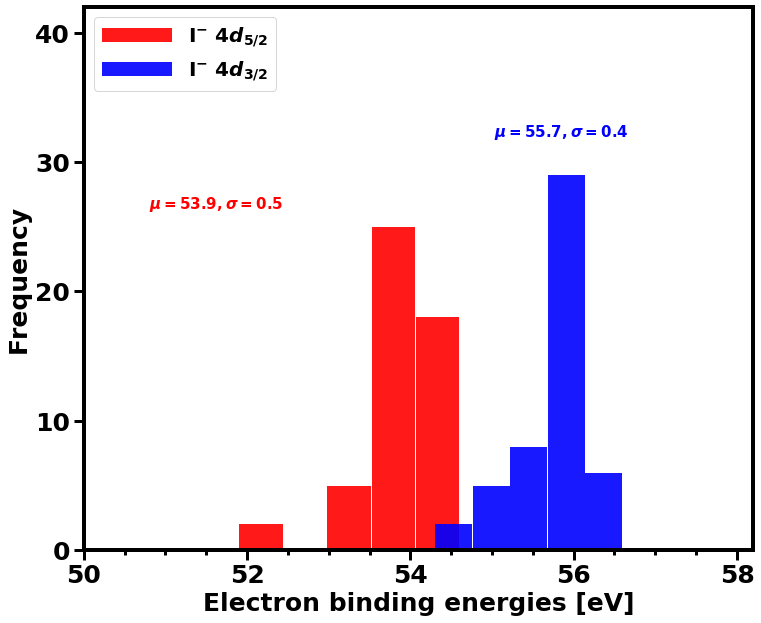

In [566]:
fig, ax = plt.subplots(figsize=(12,10))


x_i_acv2z_x2cmmf_gaunt_4d52 = df.iodide_4d52
x_i_acv2z_x2cmmf_gaunt_4d32 = df.iodide_4d32



y_i_acv2z_x2cmmf_gaunt_4d52 = [round(num, 1) for num in x_i_acv2z_x2cmmf_gaunt_4d52]
z_i_acv2z_x2cmmf_gaunt_4d52 = np.array(y_i_acv2z_x2cmmf_gaunt_4d52)



y_i_acv2z_x2cmmf_gaunt_4d32 = [round(num, 1) for num in x_i_acv2z_x2cmmf_gaunt_4d32]
z_i_acv2z_x2cmmf_gaunt_4d32 = np.array(y_i_acv2z_x2cmmf_gaunt_4d32)



def count(list_z) -> dict:
    hist = {}
    for i in list_z:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_i_acv2z_x2cmmf_gaunt_4d52 = count(z_i_acv2z_x2cmmf_gaunt_4d52)
print(counted_i_acv2z_x2cmmf_gaunt_4d52)

mean_z_i_acv2z_x2cmmf_gaunt_4d52 = np.mean(z_i_acv2z_x2cmmf_gaunt_4d52)
print("mean =", mean_z_i_acv2z_x2cmmf_gaunt_4d52)


std_z_i_acv2z_x2cmmf_gaunt_4d52 = np.std(z_i_acv2z_x2cmmf_gaunt_4d52)
print("std =", std_z_i_acv2z_x2cmmf_gaunt_4d52)


def count(list_z1) -> dict:
    hist = {}
    for i in list_z1:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted_i_acv2z_x2cmmf_gaunt_4d32 = count(z_i_acv2z_x2cmmf_gaunt_4d32)
print(counted_i_acv2z_x2cmmf_gaunt_4d32)

mean_z_i_acv2z_x2cmmf_gaunt_4d32 = np.mean(z_i_acv2z_x2cmmf_gaunt_4d32)
print("mean =", mean_z_i_acv2z_x2cmmf_gaunt_4d32)


std_z_i_acv2z_x2cmmf_gaunt_4d32 = np.std(z_i_acv2z_x2cmmf_gaunt_4d32)
print("std =", std_z_i_acv2z_x2cmmf_gaunt_4d32)


kwargs = dict(alpha=0.9, bins=5, linewidth=0.2)

dk_i_acv2z_x2cmmf_gaunt_4d52 = list(dict.keys(counted_i_acv2z_x2cmmf_gaunt_4d52))
dv_i_acv2z_x2cmmf_gaunt_4d52 = list(dict.values(counted_i_acv2z_x2cmmf_gaunt_4d52))


dk_i_acv2z_x2cmmf_gaunt_4d32 = list(dict.keys(counted_i_acv2z_x2cmmf_gaunt_4d52))
dv_i_acv2z_x2cmmf_gaunt_4d32 = list(dict.values(counted_i_acv2z_x2cmmf_gaunt_4d52))



dkmin_z_i_acv2z_x2cmmf_gaunt_4d52 = min(dk_i_acv2z_x2cmmf_gaunt_4d52)
dkmax_z_i_acv2z_x2cmmf_gaunt_4d52 = max(dk_i_acv2z_x2cmmf_gaunt_4d52)
dvmin_z_i_acv2z_x2cmmf_gaunt_4d52 = min(dv_i_acv2z_x2cmmf_gaunt_4d52)
dvmax_z_i_acv2z_x2cmmf_gaunt_4d52 = max(dv_i_acv2z_x2cmmf_gaunt_4d52)

dkmin_z_i_acv2z_x2cmmf_gaunt_4d32 = min(dk_i_acv2z_x2cmmf_gaunt_4d32)
dkmax_z_i_acv2z_x2cmmf_gaunt_4d32 = max(dk_i_acv2z_x2cmmf_gaunt_4d32)
dvmin_z_i_acv2z_x2cmmf_gaunt_4d32 = min(dv_i_acv2z_x2cmmf_gaunt_4d32)
dvmax_z_i_acv2z_x2cmmf_gaunt_4d32 = max(dv_i_acv2z_x2cmmf_gaunt_4d32)




ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)


plt.axis([50, 58.2, 0, 42])
plt.yticks(np.arange(0, 42, 10))
plt.xticks(np.arange(50, 58.2, 2))

plt.hist(z_i_acv2z_x2cmmf_gaunt_4d52, **kwargs, color='red', rwidth=0.98, label='I$^{-}$ 4$d_{5/2}$')
plt.hist(z_i_acv2z_x2cmmf_gaunt_4d32, **kwargs, color='blue', rwidth=0.98, label='I$^{-}$ 4$d_{3/2}$')
#sns.distplot(z_i_acv2z_x2cmmf_gaunt_4d52 , color='red', hist=False, kde_kws = {'color':'red', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
#sns.distplot(z_i_acv2z_x2cmmf_gaunt_4d32, color='blue', hist=False, kde_kws = {'color':'blue', 
#                       'linewidth':5, 'linestyle':'--', 'alpha':0.9})
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 20}, handlelength=3.5)
plt.figtext(0.2, 0.6, "$\mu=53.9, \sigma=0.5$", fontsize=15, color="red")
plt.figtext(0.6, 0.7, "$\mu=55.7, \sigma=0.4$", fontsize=15, color="blue")
#plt.savefig('zero_i_acv2z_x2cmmf_gaunt_4d3252.png', bbox_inches='tight', dpi=400)

plt.show()



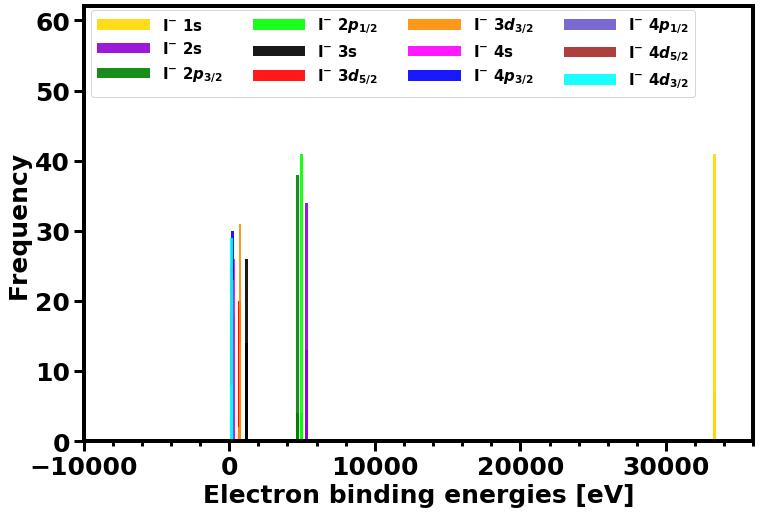

In [567]:
fig, ax = plt.subplots(figsize=(12,8))



#kwargs = dict(alpha=0.9, bins=5)


ax.xaxis.get_major_formatter().set_scientific(False)
ax.xaxis.get_major_formatter().set_useOffset(False)
#ax.set_xscale('log')


plt.minorticks_on()
plt.tick_params(axis='both', which='major', length=10, width=3)
plt.tick_params(axis='x', which='minor', length=5, width=3)
plt.axis([-10000, 36000.50, 0, 62])
plt.yticks(np.arange(0, 62, 10))
plt.xticks(np.arange(-10000, 36000.50, 10000))


plt.hist(z_i_acv2z_x2cmmf_gaunt_1s, **kwargs, color='gold', rwidth=0.98, label='I$^{-}$ 1s', width=200)
plt.hist(z_i_acv2z_x2cmmf_gaunt_2s, **kwargs, color='darkviolet', rwidth=0.99, label='I$^{-}$ 2s', width=200)


plt.hist(z_i_acv2z_x2cmmf_gaunt_2p32, **kwargs, color='green', rwidth=0.98, label='I$^{-}$ 2$p_{3/2}$', width=200)
plt.hist(z_i_acv2z_x2cmmf_gaunt_2p12, **kwargs, color='lime', rwidth=0.98, label='I$^{-}$ 2$p_{1/2}$', width=200)


plt.hist(z_i_acv2z_x2cmmf_gaunt_3s, **kwargs, color='black', rwidth=0.99, label='I$^{-}$ 3s', width=200)


plt.hist(z_i_acv2z_x2cmmf_gaunt_3d52, **kwargs, color='red', rwidth=0.98, label='I$^{-}$ 3$d_{5/2}$', width=200)
plt.hist(z_i_acv2z_x2cmmf_gaunt_3d32, **kwargs, color='darkorange', rwidth=0.98, label='I$^{-}$ 3$d_{3/2}$', width=200)


plt.hist(z_i_acv2z_x2cmmf_gaunt_4s, **kwargs, color='magenta', rwidth=0.99, label='I$^{-}$ 4s', width=200)

plt.hist(z_i_acv2z_x2cmmf_gaunt_4p32, **kwargs, color='blue', rwidth=0.98, label='I$^{-}$ 4$p_{3/2}$', width=200)
plt.hist(z_i_acv2z_x2cmmf_gaunt_4p12, **kwargs, color='slateblue', rwidth=0.98, label='I$^{-}$ 4$p_{1/2}$', width=200)

plt.hist(z_i_acv2z_x2cmmf_gaunt_4d52, **kwargs, color='brown', rwidth=0.98, label='I$^{-}$ 4$d_{5/2}$', width=200)
plt.hist(z_i_acv2z_x2cmmf_gaunt_4d32, **kwargs, color='cyan', rwidth=0.98, label='I$^{-}$ 4$d_{3/2}$', width=200)



plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')
plt.xlabel('Electron binding energies [eV]', fontsize=25, fontweight='bold')
plt.ylabel('Frequency', fontsize=25, fontweight='bold')
plt.legend(loc=2, prop={'size': 15}, handlelength=3.5, ncol=4, bbox_to_anchor=(0,1.01))
#plt.savefig('i_acv3z_x2cmmf_gaunt_all.png', bbox_inches='tight', dpi=400)

plt.show()